In [419]:
#%matplotlib inline
import matplotlib.pyplot as plt
import underworld as uw
import glucifer
import numpy as np
import slippy2 as sp
import math


In [420]:
refineby = 0.50001 
A = 0.01

In [421]:
mesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"), 
                                 elementRes  = (128,64), 
                                 minCoord    = (-1., 0.), 
                                 maxCoord    = (1., 1.))

In [422]:
temperatureField    = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=1 )



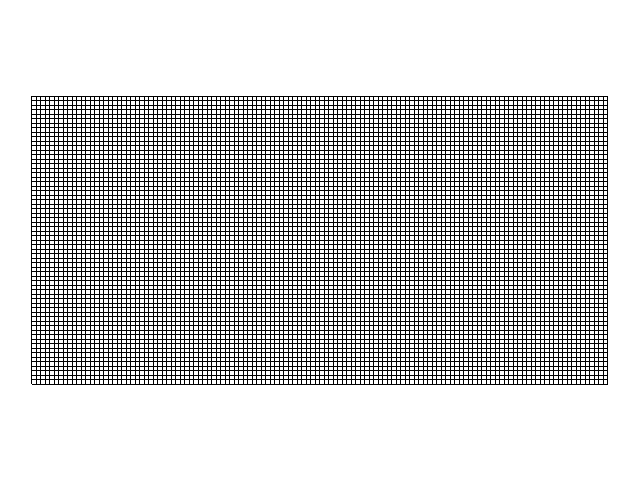

In [423]:
figMesh = glucifer.Figure(antialias=1)
#figMesh.append( glucifer.objects.Mesh(mesh.subMesh, nodeNumbers=True) )
figMesh.append( glucifer.objects.Mesh(mesh) )
figMesh.show()

In [424]:
def mesh_min_max(mesh, axis='x'):
    if axis == "y":
        thisaxis = 1
    else:
        thisaxis = 0
    return np.diff(np.sort(np.unique(mesh.data[:,thisaxis]))).min(), \
    np.diff(np.sort(np.unique(mesh.data[:,thisaxis]))).max()

In [425]:
dxmin,dxmax = mesh_min_max(mesh, axis='x')
dymin,dymax = mesh_min_max(mesh, axis='y')
print(dxmin,dxmax,dymin,dymax)

(0.015625, 0.015625, 0.015625, 0.015625)


## Temp ICS

In [426]:
dummymesh = uw.mesh.FeMesh_Cartesian( elementType = ("Q1/dQ0"),
                                 elementRes  = (128, 64), 
                                 minCoord    = (-1.,0.), 
                                 maxCoord=(1.,1.))
    
dummytemperatureField = uw.mesh.MeshVariable(mesh=dummymesh, nodeDofCount=1 )

dummytemperatureField.load("8100/temperatureField.hdf5")

In [427]:
for index, coord in enumerate(mesh.data):
    #Don't know mesh partitions in advance, and possible diferent between 'real' and 'dummy' mesh
    try:
        #temperatureField.data[index] = dummytemperatureField.evaluate([coord[0], coord[1]])
        temperatureField.data[index] = 10.5
    except:
        pass

In [428]:
tempNump = temperatureField.data
for index, coord in enumerate(mesh.data):
    pertCoeff = (1- coord[1]) + A*math.cos( math.pi * abs(1. - coord[0]) ) * math.sin( math.pi * coord[1] )
    tempNump[index] = pertCoeff;
    if coord[1] > 1:
        tempNump[index] = 0.

In [429]:
# area
areaint = uw.utils.Integral( 1.,               mesh )
tempint = uw.utils.Integral(temperatureField, mesh)
def avg_temp():
    return tempint.evaluate()[0]/areaint.evaluate()[0]

area = np.copy(areaint.evaluate()[0])
temp =  np.copy(avg_temp())

## Shiskin refinement

In [430]:

axis = 0
#print((mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis]))
#print(mesh.data_nodegId.shape)
xkeys, ykeys = sp.mesh_element_keys(mesh)

#print(xkeys.shape, ykeys.shape,)

In [431]:
testx = []
for index, coord in enumerate(mesh.data):
    testx.append(index)
    
    
    
print("unique mesh index: ", np.unique(testx).shape)

('unique mesh index: ', (8385,))


In [432]:
#X-Axis
mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
third = edge_rest_lengths.shape[0]/3
deform_lengths[third:2*third] *= refineby ##The matix can go singular when this is exactly 1.

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = [])

Min
(128, 0.0078126562499999993, 1.6718815624999999, 0.48837209302325607)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 0.000299519120992
| p_n+1 - p_n |^2: 1.15089070244
-- iteration 1 --
| F( p_n ) |^2: 2.79747342953e-31
Min, Max element width: 
0.00781
0.01944


In [433]:
#Y-Axis
axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)
third = edge_rest_lengths.shape[0]/3
deform_lengths = np.copy(edge_rest_lengths)
deform_lengths

deform_lengths[2*third:] *= refineby ##The matix can go singular when this is exactly 1.
sp.deform_1d(deform_lengths, mesh, axis = 'y',norm = 'Min', constraints = [])


Min
(64, 0.0078126562499999993, 0.82812843749999987, 0.52380952380952439)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 0.000219496339639
| p_n+1 - p_n |^2: 0.630524133437
-- iteration 1 --
| F( p_n ) |^2: 3.37970612585e-31
Min, Max element width: 
0.00781
0.01972


In [434]:
for index, coord in enumerate(mesh.data):
    #Don't know mesh partitions in advance, and possible diferent between 'real' and 'dummy' mesh
    try:
        #temperatureField.data[index] = dummytemperatureField.evaluate([coord[0], coord[1]])
        temperatureField.data[index] = 10.5
    except:
        pass

In [435]:
tempNump = temperatureField.data
for index, coord in enumerate(mesh.data):
    pertCoeff = (1- coord[1]) + A*math.cos( math.pi * abs(1. - coord[0]) ) * math.sin( math.pi * coord[1] )
    tempNump[index] = pertCoeff;
    if coord[1] > 1:
        tempNump[index] = 0.


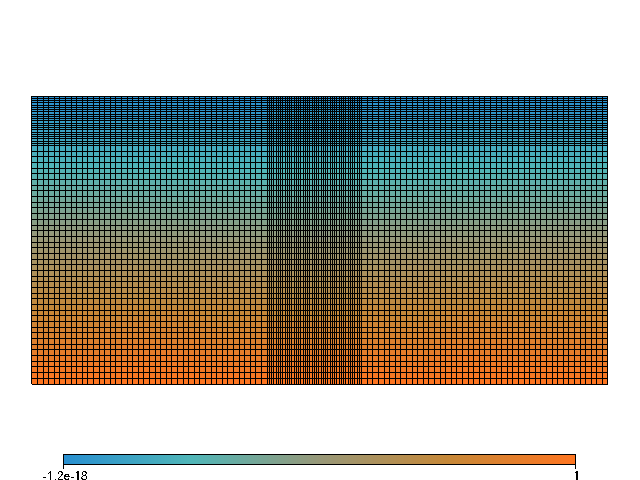

In [436]:
figMesh.save_database('test.gldb')
figMesh.append( glucifer.objects.Surface(mesh, temperatureField))
figMesh.show()

In [437]:
mesh_min_max(mesh, axis='x')

(0.0078126562500000496, 0.019440330668604733)

In [438]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])
#print(dxorig, dyorig)

1.9999600008
1.9999600008


In [439]:
# area
areaint = uw.utils.Integral( 1.,               mesh )
tempint = uw.utils.Integral(temperatureField, mesh)
def avg_temp():
    return tempint.evaluate()[0]/areaint.evaluate()[0]

shiskin_area = np.copy(areaint.evaluate()[0])
shiskin_temp =  np.copy(avg_temp())



## Linear refinement

In [440]:
deform_lengths

array([ 0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,  0.015625  ,
        0.015625  ,  0.015625  ,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266,  0.00781266,
        0.00781266,  0.00781266,  0.00781266,  0.00781266])

In [441]:
#X-Axis
mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (abs(mesh.maxCoord[axis]) - abs(mesh.minCoord[axis]))/2.
el_reduction = refineby
dx = mesh.maxCoord[axis] - min_point

deform_lengths = deform_lengths - \
                                ((1.-el_reduction) *deform_lengths[0]) + \
                                abs((origcoords[1:] - min_point))*((0.5*deform_lengths[0])/dx)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = [])

Min
(128, 0.0078126562499999993, 1.5000199999999995, 0.99996000000000196)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 0.000125879974416
| p_n+1 - p_n |^2: 1.06922831723
-- iteration 1 --
| F( p_n ) |^2: 3.7071744017e-31
Min, Max element width: 
0.00781
0.02344


In [442]:
dx

1.0

In [443]:
#Y-Axis
axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (mesh.maxCoord[axis])
el_reduction = refineby
dx = mesh.maxCoord[axis]

deform_lengths = deform_lengths - \
                                ((1.-el_reduction)*deform_lengths[0]) + \
                                abs((origcoords[1:] - min_point))*((0.5*deform_lengths[0])/dx)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'y',norm = 'Min', constraints = [])

Min
(64, 0.0078126562499999993, 0.74610374999999984, 1.031705396825398)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 0.000125940522744
| p_n+1 - p_n |^2: 0.55037687646
-- iteration 1 --
| F( p_n ) |^2: 1.9405549749e-31
Min, Max element width: 
0.00781
0.02344


In [444]:
for index, coord in enumerate(mesh.data):
    #Don't know mesh partitions in advance, and possible diferent between 'real' and 'dummy' mesh
    try:
        #temperatureField.data[index] = dummytemperatureField.evaluate([coord[0], coord[1]])
        temperatureField.data[index] = 10.5
    except:
        pass

In [445]:
tempNump = temperatureField.data
for index, coord in enumerate(mesh.data):
    pertCoeff = (1- coord[1]) + A*math.cos( math.pi * abs(1. - coord[0]) ) * math.sin( math.pi * coord[1] )
    tempNump[index] = pertCoeff;
    if coord[1] > 1:
        tempNump[index] = 0.


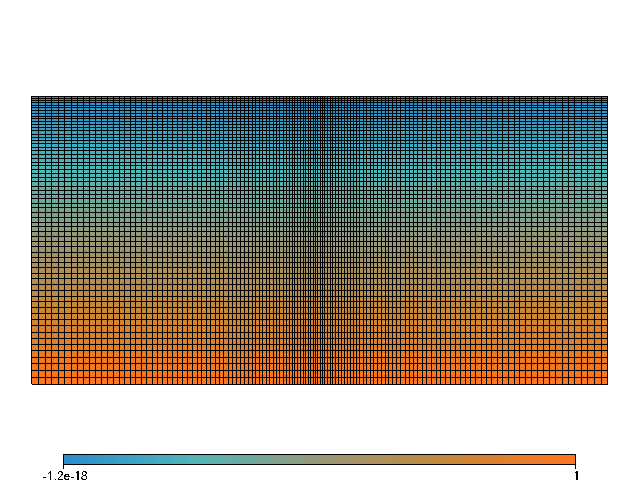

In [446]:
figMesh.save_database('test.gldb')
figMesh.show()

In [447]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])

1.9999600008
1.9999600008


In [448]:
# area
areaint = uw.utils.Integral( 1.,               mesh )
tempint = uw.utils.Integral(temperatureField, mesh)
def avg_temp():
    return tempint.evaluate()[0]/areaint.evaluate()[0]

linear_area = np.copy(areaint.evaluate()[0])
linear_temp =  np.copy(avg_temp())

## Cosine - spline

In [449]:
#X-Axis
mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (abs(mesh.maxCoord[axis]) - abs(mesh.minCoord[axis]))/2.
el_reduction = refineby


deform_lengths = deform_lengths - (1.-el_reduction)*deform_lengths[0]*np.cos(np.pi*origcoords[1:])

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = [])

Min
(128, 0.0078126562499999993, 2.0, 0.0)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 0.000131328518561
| p_n+1 - p_n |^2: 1.62335268728
-- iteration 1 --
| F( p_n ) |^2: 5.37099731772e-31
Min, Max element width: 
0.00781
0.02344


In [450]:
#Y-Axis

axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  1.
el_reduction = refineby



deform_lengths = deform_lengths - ((1.-el_reduction)*deform_lengths[0])*np.cos(abs(np.pi*(origcoords[1:] - min_point)))

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'y',norm = 'Min', constraints = [])

Min
(64, 0.0078126562499999993, 0.99218765624999994, 0.015873015873015997)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 0.00013070353679
| p_n+1 - p_n |^2: 0.836159635998
-- iteration 1 --
| F( p_n ) |^2: 2.90941810755e-31
Min, Max element width: 
0.00781
0.02368


In [451]:
print(edge_rest_lengths.min(), deform_lengths.min())

(0.015625, 0.0078126562499999993)


In [452]:
for index, coord in enumerate(mesh.data):
    #Don't know mesh partitions in advance, and possible diferent between 'real' and 'dummy' mesh
    try:
        #temperatureField.data[index] = dummytemperatureField.evaluate([coord[0], coord[1]])
        temperatureField.data[index] = 10.5
    except:
        pass

In [453]:
tempNump = temperatureField.data
for index, coord in enumerate(mesh.data):
    pertCoeff = (1- coord[1]) + A*math.cos( math.pi * abs(1. - coord[0]) ) * math.sin( math.pi * coord[1] )
    tempNump[index] = pertCoeff;
    if coord[1] > 1:
        tempNump[index] = 0.


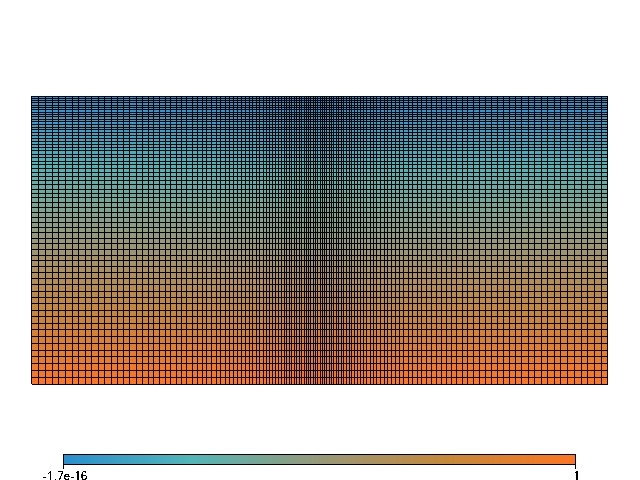

In [454]:
figMesh.save_database('test.gldb')
figMesh.show()

In [455]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])


1.9999600008
1.9999600008


In [456]:
# area
areaint = uw.utils.Integral( 1.,               mesh )
tempint = uw.utils.Integral(temperatureField, mesh)
def avg_temp():
    return tempint.evaluate()[0]/areaint.evaluate()[0]

cosine_area = np.copy(areaint.evaluate()[0])
cosine_temp =  np.copy(avg_temp())

## Gauss Refine

In [457]:
#X-Axis

def gauss(r,a):
    return np.exp(-r**2/a**2) 

a = 0.2


mesh.reset()
axis = 0
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  (abs(mesh.maxCoord[axis]) - abs(mesh.minCoord[axis]))/2.
el_reduction = 1.- refineby

deform_lengths = deform_lengths - (el_reduction*deform_lengths[0])*gauss((origcoords[1:] - min_point), a)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'x',norm = 'Min', constraints = [])

Min
(128, 0.0078126562499999993, 1.8227581598174367, 0.21542922018092941)
('edges', 128)
-- iteration 0 --
| F( p_n ) |^2: 1.44797656296e-05
| p_n+1 - p_n |^2: 0.287919467574
-- iteration 1 --
| F( p_n ) |^2: 4.45894911843e-31
Min, Max element width: 
0.00781
0.01731


In [458]:
#deform_lengths - (el_reduction*deform_lengths[0])*gauss((origcoords[1:] - min_point), a)

In [459]:
#Y-Axis

def gauss(r,a):
    return np.exp(-r**2/a**2) 

axis = 1
origcoords = np.linspace(mesh.minCoord[axis], mesh.maxCoord[axis], mesh.elementRes[axis] + 1)
edge_rest_lengths = np.diff(origcoords)

deform_lengths = edge_rest_lengths.copy()
min_point =  0.9801
el_reduction = 1.- refineby

deform_lengths = deform_lengths - (el_reduction*deform_lengths[0])*gauss((origcoords[1:] - min_point), a)

#print(edge_rest_lengths.shape, deform_lengths.shape)

sp.deform_1d(deform_lengths, mesh,axis = 'y',norm = 'Min', constraints = [])

Min
(64, 0.0078162248213331804, 0.89760435402532834, 0.25768599949453364)
('edges', 64)
-- iteration 0 --
| F( p_n ) |^2: 6.83203343421e-05
| p_n+1 - p_n |^2: 0.194724921
-- iteration 1 --
| F( p_n ) |^2: 3.34058567385e-31
Min, Max element width: 
0.00782
0.01764


In [460]:
for index, coord in enumerate(mesh.data):
    #Don't know mesh partitions in advance, and possible diferent between 'real' and 'dummy' mesh
    try:
        #temperatureField.data[index] = dummytemperatureField.evaluate([coord[0], coord[1]])
        temperatureField.data[index] = 10.5
    except:
        pass

In [461]:
tempNump = temperatureField.data
for index, coord in enumerate(mesh.data):
    pertCoeff = (1- coord[1]) + A*math.cos( math.pi * abs(1. - coord[0]) ) * math.sin( math.pi * coord[1] )
    tempNump[index] = pertCoeff;
    if coord[1] > 1:
        tempNump[index] = 0.


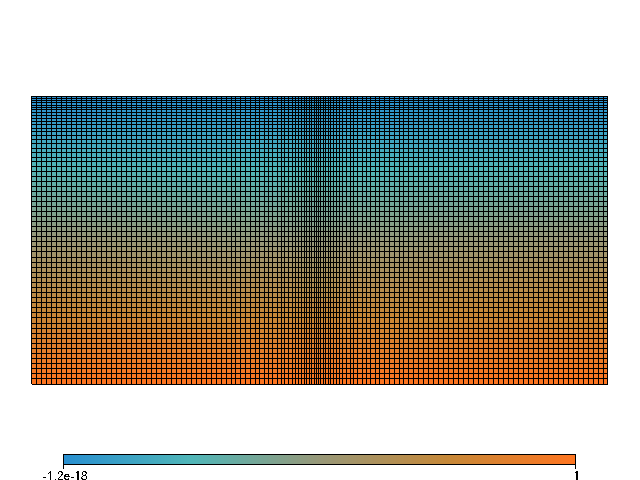

In [462]:
figMesh.save_database('test.gldb')
figMesh.show()

In [463]:
print(dxmin/mesh_min_max(mesh, axis='x')[0])
print(dymin/mesh_min_max(mesh, axis='y')[0])

1.9999600008
1.99904690015


In [464]:
# area
areaint = uw.utils.Integral( 1.,               mesh )
tempint = uw.utils.Integral(temperatureField, mesh)
def avg_temp():
    return tempint.evaluate()[0]/areaint.evaluate()[0]

gauss_area = np.copy(areaint.evaluate()[0])
gauss_temp =  np.copy(avg_temp())


In [465]:
if uw.rank() == 0:
    print("uniform: ", area, temp)
    print("linear: ", linear_area, linear_temp)
    print("cosine: ", cosine_area, cosine_temp)
    print("gaussian: ", gauss_area, gauss_temp)
else:
    pass

('uniform: ', array(2.0), array(0.5))
('linear: ', array(2.000000000000006), array(0.4999994822927494))
('cosine: ', array(1.999999999999967), array(0.4999993812328058))
('gaussian: ', array(2.000000000000041), array(0.49999984124079205))


In [466]:
areaint = uw.utils.Integral( 1.,               mesh )

In [467]:
areaint.evaluate()

[2.000000000000041]